In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Input, Convolution2D, Convolution3D, MaxPool2D, Dense, Dropout, Flatten

#### data preparation

In [0]:
from keras.datasets import fashion_mnist

In [120]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [121]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [0]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [124]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [0]:
# convert the label into one hot encoded
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

### CNN Model

In [0]:
model = Sequential()
model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu',input_shape = (28, 28, 1)))
model.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D(2, 2))
model.add(Convolution2D(32, (5, 5), activation='relu'))
model.add(Convolution2D(16, (5, 5), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
## compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [147]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 4, 4, 16)          12816     
_________________________________________________________________
flatten_7 (Flatten)          (None, 256)               0         
__________

In [150]:
hist = model.fit(x_train,y_train,epochs=10,shuffle=True, batch_size=256, validation_split=0.135)

Train on 51900 samples, validate on 8100 samples
Epoch 1/10
51900/51900 [==============================] - 4s 73us/step - loss: 0.2241 - acc: 0.9177 - val_loss: 0.2910 - val_acc: 0.8983
Epoch 2/10
51900/51900 [==============================] - 4s 71us/step - loss: 0.2144 - acc: 0.9210 - val_loss: 0.2916 - val_acc: 0.8972
Epoch 3/10
51900/51900 [==============================] - 4s 71us/step - loss: 0.2025 - acc: 0.9252 - val_loss: 0.2827 - val_acc: 0.8979
Epoch 4/10
51900/51900 [==============================] - 4s 72us/step - loss: 0.1954 - acc: 0.9288 - val_loss: 0.2999 - val_acc: 0.8912
Epoch 5/10
51900/51900 [==============================] - 4s 72us/step - loss: 0.1880 - acc: 0.9305 - val_loss: 0.3121 - val_acc: 0.8928
Epoch 6/10
51900/51900 [==============================] - 4s 72us/step - loss: 0.1857 - acc: 0.9303 - val_loss: 0.2961 - val_acc: 0.9009
Epoch 7/10
51900/51900 [==============================] - 4s 73us/step - loss: 0.1784 - acc: 0.9342 - val_loss: 0.3032 - val_acc:

training_loss = 0.15747322748851225    val_loss = 0.30250743635642674
training_acc = 94.15414257499754    val_acc = 89.80246919172782


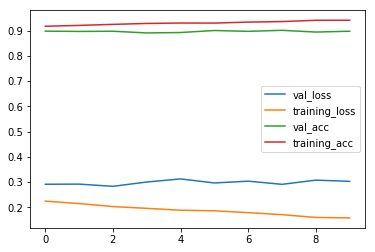

In [151]:
# plot loss
print("training_loss =", hist.history['loss'][-1],  "   val_loss =", hist.history['val_loss'][-1])
print("training_acc =", hist.history['acc'][-1]*100, "   val_acc =", hist.history['val_acc'][-1]*100)
plt.plot(hist.history['val_loss'], label='val_loss')
plt.plot(hist.history['loss'], label='training_loss')

# plot loss
plt.plot(hist.history['val_acc'], label='val_acc')
plt.plot(hist.history['acc'], label='training_acc')
plt.legend()
plt.show()

In [0]:
p = model.predict(x_test)

In [0]:
y_ = np.argmax(p, axis = 1)

In [0]:
import sklearn.metrics as metrics

In [155]:
metrics.accuracy_score(y_, np.argmax(y_test, axis = 1))

0.9004